In [1]:
# Intallation packages before use Jupyter

!pip install pandas
!pip install -U scikit-learn
!pip install keras
!pip install matplotlib
!pip install kaleido
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 35.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 56.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pi

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
# from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.metrics import Precision, Accuracy
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from keras.optimizers import schedules
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# be able to save images on server
matplotlib.use('Agg')

# Not show warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# !pip install -U kaleido # w Google Colab wymagany Runtime restart po instalacji (Runtime -> Restart Runtime)
import kaleido #required
# kaleido.__version__ #0.2.1

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-07-07 22:06:14.667310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 22:06:14.730568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 22:06:14.731036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 22:06:14.812488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2
Num GPUs Available:  1


In [3]:
# Zip
# importing the "tarfile" module
import tarfile # type: ignore

# open file
file = tarfile.open('2_150x9.tar.gz')

# extracting a specific file
file.extractall(path='./data/2_150x9/')

file.close()

In [4]:
# Data generator
def data(time, features):
    # Timestep 
    # timestepsPerSample = 20
    timestepsPerSample = time

    # Timesteps in input data
    timestepsPerSampleWholeData = 150

    # Replace 'your_file.csv' with the actual file path
    file_features = './data/2_150x9/2_150x9f.csv'
    file_labels = './data/2_150x9/2_150x9l.csv'

    # Read the .csv file and create an array
    data_strings = np.genfromtxt(file_features, delimiter=';')
    labels_strings = np.genfromtxt(file_labels,delimiter=';')


    # Wycinanie wybranych kolumn
    #  0    1         2             3        4       5        6    7        8
    # RSI, VWAP, HeikenResult, closeHeiken, CMF, Stochastic, OBV, QQE, TrendFilter
    # data_s = data_strings[:,[0,2,3,4,5,6,7,8]]
    if features == 0:
        data_s = data_strings[:,[0,4,5,8]]
    elif features == 1:
        data_s = data_strings[:,[0,1,4,5,6,8]]
    elif features == 2:
        data_s = data_strings[:,:]
        
    num_features = data_s.shape[1]
    # print(data_strings[:3])
    # print(data_s[:3])

    
    # Convert from strings to float and int
    X = data_s.astype(float).reshape((-1,timestepsPerSampleWholeData,num_features))
    Y = labels_strings.astype(float).reshape((-1,6))
    # print(X.shape)
    # print(Y.shape)

    # Modification from imported to new size X[samples,timesteps]
    X_mod = X[1000:11000,timestepsPerSampleWholeData - timestepsPerSample:]
    Y_mod = Y[1000:11000]
    timestepsPerSampleWholeData = X_mod.shape[1]
    # print(X_mod.shape)
    # print(Y_mod.shape)
    # print(X_mod[:1])

    # Splitting
    x_train, x_test, Y_train, Y_test = train_test_split(X_mod,Y_mod, test_size=0.15, shuffle=False)
    y_train = Y_train[:, 0:2]
    y_test = Y_test[:, 0:2]
    # print(y_train[:2])
    # print(y_test[:2])

    # Summarize
    num_samples = x_train.shape[0]
    test_samples = x_test.shape[0]
    print(f"Train shape: {x_train.shape}")
    print(f"Timesteps: {timestepsPerSampleWholeData}")
    print(f"Train Samples: {num_samples}")
    print(f"Test Samples: {test_samples}")
    print(f"Num features: {num_features}")
    return x_train, x_test, y_train, y_test, Y_test

In [5]:
# Data gen
timeStep = 150
features = 0

x_train, x_test, y_train, y_test, Y_test = data(timeStep, features)

Train shape: (8500, 150, 4)
Timesteps: 150
Train Samples: 8500
Test Samples: 1500
Num features: 4


In [16]:
# fit lstm model
from tabnanny import verbose

def shuffle_weights(model, weights=None):
    """Randomly permute the weights in `model`, or the given `weights`.
    This is a fast approximation of re-initializing the weights of a model.
    Assumes weights are distributed independently of the dimensions of the weight tensors
      (i.e., the weights have the same distribution along each dimension).
    :param Model model: Modify the weights of the given model.
    :param list(ndarray) weights: The model's weights will be replaced by a random permutation of these weights.
      If `None`, permute the model's current weights.
    """
    if weights is None:
        weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    # Faster, but less random: only permutes along the first dimension
    # weights = [np.random.permutation(w) for w in weights]
    model.set_weights(weights)


def fit_lstmModel(i, x_train, y_train, x_test, y_test, batch_size, nb_epoch, neurons, denseType, dropout, modelVar, learning_rate):
    LstmLayer = LSTM(
    units=neurons,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True, # true if cuDNN
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=dropout, # !important parameter for optimization => 0 if cuDNN
    recurrent_dropout=0.0,
    seed=None,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False, # false if cuDNN
    input_shape=(x_train.shape[1],x_train.shape[2]),
    # input_dim=(x_train.shape[1])
    ) 

    if modelVar == 0:
        model = Sequential() # initializing model
        # input layer and LSTM layer with 50 neurons
        model.add(LstmLayer)
        # model.add(Dense(100, activation='relu'))
        # model.add(Dense(100, activation='relu'))
        # model.add(Dense(20, activation='relu'))
        # outpute layer with sigmoid activation
        model.add(Dense(y_train.shape[1], activation='sigmoid'))
        
    if modelVar == 1:
        model = Sequential()

        # Assuming `data` is your input matrix with shape (samples, time_steps, features)
        model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
        model.add(Dropout(dropout))

        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dropout(dropout))

        model.add(Dense(units=25))
        model.add(Dropout(dropout))

        # Output layer for price prediction
        model.add(Dense(y_train.shape[1], activation='sigmoid'))

    elif modelVar == 2:
        model = Sequential()

        # Assuming `data` is your input matrix with shape (samples, time_steps, features)
        model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
        model.add(Dropout(dropout))

        model.add(LSTM(units=150, return_sequences=False))
        model.add(Dropout(dropout))

        model.add(Dense(units=75))
        model.add(Dropout(dropout))

        # Output layer for price prediction
        model.add(Dense(y_train.shape[1], activation='sigmoid'))

    elif modelVar == 3:
        model = Sequential()

        # Assuming `data` is your input matrix with shape (samples, time_steps, features)
        model.add(LSTM(units=300, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
        model.add(Dropout(dropout))

        model.add(LSTM(units=300, return_sequences=False))
        model.add(Dropout(dropout))

        model.add(Dense(units=150))
        model.add(Dropout(dropout))

        # Output layer for price prediction
        model.add(Dense(y_train.shape[1], activation='sigmoid'))

    elif modelVar == 4:
        model = Sequential()

        # Assuming `data` is your input matrix with shape (samples, time_steps, features)
        model.add(LSTM(units=1000, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
        model.add(Dropout(dropout))

        model.add(LSTM(units=1000, return_sequences=False))
        model.add(Dropout(dropout))

        model.add(Dense(units=500))
        model.add(Dropout(dropout))

        # Output layer for price prediction
        model.add(Dense(y_train.shape[1], activation='sigmoid'))
    
    # Callback Checkpoint
    checkpoint = ModelCheckpoint(
            filepath='./saved_models/last_saved_model.keras',
            save_best_only=True,
            monitor='val_loss',
            verbose=1
            )

    # Callback EarlyStopping
    earlyStopping = EarlyStopping(monitor='val_loss',
                                             start_from_epoch=5,
                                             restore_best_weights=True,
                                             verbose=0,
                                             patience=3)
    
    #  Callback profit
    profitList = list()
    
    class MyCallback(Callback):
        def on_epoch_end(self, epoch, logs=None):
            predict = model.predict(x_test, batch_size=batch_size)
            profit = funcProfit(predict, Y_test)

            if epoch > 0:
                if profit > max(profitListSaveModel):
                    model.save(f'./saved_models/best_model_{str(testingParameter)}_{str(modelVar)}.keras')
                    # model.save(f'./saved_models/best_model_{str(testingParameter)}_{str(model)}.keras')
                    print(f"New best model saved, previous best profit -> {str(max(profitListSaveModel))}")
            profitList.append(profit)
            profitListSaveModel.append(profit)
            print(f"Profit: {profit}")


    # Optimizer
    num_samples = x_train.shape[0]
    STEPS_PER_EPOCH = num_samples/batch_size

    lr_schedule = schedules.InverseTimeDecay(
    # lr_schedule = schedules.ExponentialDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*100,
    decay_rate=0.9,
    staircase=False)

    def get_optimizer():
         # return tf.keras.optimizers.Adam(learning_rate=0.001)
        # return tf.keras.optimizers.Adam() # type: ignore
        # return tf.keras.optimizers.RMSprop(learning_rate=learning_rate) # type: ignore
        return tf.keras.optimizers.Adam(learning_rate= lr_schedule) # type: ignore

    optimizer = get_optimizer()

    # defining loss function, optimizer, metrics and then compiling model
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['precision'])

    # Save initial weights on first compile. In next compile restore initial weights
    if i == 0:
        model.save_weights("./saved_models/initial.weights.h5")
    elif i > 0:
        shuffle_weights(model, weights=None)
        
    model.summary()

    # fit model
    history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, 
                        shuffle=False, validation_data=(x_test, y_test), callbacks=[checkpoint, earlyStopping, MyCallback()], verbose=2) # type: ignore
    
    # Convert list() to array
    profitArray = np.array(profitList)
    
    return model, history, profitArray

In [17]:
# Profit old
def funcProfitOld(predict, Y_test):
    predict_classes = np.where(predict > 0.5, 1,0)
    concat = np.hstack((predict_classes, Y_test[:,2:]))
    # df = pd.DataFrame(concat, columns=['Sell', 'Buy', 'Price'])
    df = pd.DataFrame(concat, columns=['Sell', 'Buy', 'Price', 'Open', 'High', 'Low'])

    # Absolute difference prices
    sum = 0
    for i in range(0, len(df)):
        if (i-1) > 0:
            diff = abs((df.at[i,'Sell'] - df.at[i-1,'Sell']))
            if diff < 0.5:
                if df.at[i,'Sell'] == 1:
                    sum += (df.at[i,'Price'] - df.at[i-1,'Price'])*(-1)
                elif df.at[i,'Buy'] == 1:
                    sum += (df.at[i,'Price'] - df.at[i-1,'Price'])
                if df.at[i,'Sell'] != df.at[i-1,'Sell']:
                    sum -= 0.03
    return sum


# Profit
def funcProfit(predict, Y_test):
    predict_classes = np.where(predict > 0.56, 1,0)
    concat = np.hstack((predict_classes, Y_test[:,2:]))
    # df = pd.DataFrame(concat, columns=['Sell', 'Buy', 'Price'])
    df = pd.DataFrame(concat, columns=['Sell', 'Buy', 'Close', 'Open', 'High', 'Low'])

    # Absolute difference prices
    spread = 0.03
    tp = 1000 # 0.20
    sum = 0
    sell = 0
    buy = 0
    for i in range(0, len(df)):
        if (i-1) >= 0:
            if df.at[i,'Sell'] > 0.8 and df.at[i-1,'Sell'] < 0.2:                  # S 0 1 
                if buy > 0:
                    sell = df.at[i,'Open'] - spread
                    sum += df.at[i,'Open'] - buy
                    buy = 0
                elif sell == 0:
                    sell = df.at[i,'Open'] - spread
            elif df.at[i,'Sell'] > 0.8 and df.at[i-1,'Sell'] > 0.8 and sell > 0:   # S 1 1 sell >0
                if df.at[i-1,'High'] >= (sell + tp):
                    sum -= tp
                    sell = 0
                if df.at[i-1,'Low'] <= (sell - tp):
                    sum += tp
                    sell = 0
# --------------------------------------------------------------------------------------------------------

            elif df.at[i,'Buy'] > 0.8 and df.at[i-1,'Buy'] < 0.2:               # B 0 1 
                if sell > 0:
                    buy = df.at[i,'Open'] + spread
                    sum += sell - df.at[i,'Open']
                    sell = 0
                elif buy == 0:
                    buy = df.at[i,'Open'] + spread
            elif df.at[i,'Buy'] > 0.8 and df.at[i-1,'Buy'] > 0.8 and buy > 0:   # B 1 1 buy >0
                if df.at[i-1,'Low'] <= (buy - tp):
                    sum -= tp
                    buy = 0
                if df.at[i-1,'High'] >= (buy + tp):
                    sum += tp
                    buy = 0

    return round(sum, 2)

In [18]:
# Experiment
def experiment(i, repeats, epochs, neurons, time, denseType, dropout, modelVar, features, learning_rate):
    # # Data gen
    # x_train, x_test, y_train, y_test, Y_test = data(time, features)

    # Evaluate declaration
    accuracy = list()
    profit = list()
    profitOld = list()
    metrics = list()

    # Repeats
    for r in range(repeats):
        print(f"Repeat {r} running...")
        # Batch size
        batch_size = 64
        # model
        model, history, profitArray = fit_lstmModel(i, x_train, y_train, x_test, y_test, batch_size, epochs, neurons, denseType, dropout, modelVar, learning_rate)
        i += 1
        
        # forecast the entire training dataset to build up state for forecasting
        model = load_model(filepath="./saved_models/last_saved_model.keras")
        predict = model.predict(x_test, batch_size=batch_size)
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # type: ignore

        metric = pd.DataFrame(history.history)
        metric['epoch'] = history.epoch

        # Add column Profit with profit result for epochs
        metric = metric.assign(Profit=profitArray)

        metrics.append(metric)
        accuracy.append(test_acc*100)
        profit.append(funcProfit(predict, Y_test))
        profitOld.append(funcProfitOld(predict, Y_test))
    
    return accuracy, profit, profitOld, metrics

In [19]:
# Output
def plotsOut(d, metrics):
    fig = make_subplots(rows=1, cols=3, subplot_titles=('Accuracy', 'Loss', 'Profit'))

    # Layout - set size
    fig.update_layout(
        autosize=True,
        width=1600,
        height=1000
    )

    for idx, m in enumerate(metrics):
        fig.add_trace(go.Scatter(x=m['epoch'], y=m['accuracy'], name=f'accuracy{str(idx)}', line_color='#0000ff', showlegend=False), row=1, col=1)
        fig.add_trace(go.Scatter(x=m['epoch'], y=m['loss'], name=f'loss{str(idx)}', line_color='#0000ff', showlegend=False), row=1, col=2)
        fig.add_trace(go.Scatter(x=m['epoch'], y=m['val_accuracy'], name=f'val_accuracy{str(idx)}', line_color='#EF8260', showlegend=False), row=1, col=1)
        fig.add_trace(go.Scatter(x=m['epoch'], y=m['val_loss'], name=f'val_loss{str(idx)}', line_color='#EF8260', showlegend=False), row=1, col=2)
        fig.add_trace(go.Scatter(x=m['epoch'], y=m['Profit'], name=f'profit{str(idx)}', line_color='#EF8260', showlegend=False), row=1, col=3)

    fig.update_xaxes(title_text='epochs')
    fig.update_yaxes(title_text='')
    # fig.update_layout(width=1000, title='Accuracy and Loss')
    fig.write_image(file=f"compare_models_{str(d)}.jpg", engine="kaleido")
    fig.show()

In [21]:
# Run
from numpy import dtype

repeats = 5
testingParameter = "Model"
runMeter = 0
results_acc = DataFrame(dtype='float')
results_profit = DataFrame(dtype='float')
results_profitOld = DataFrame(dtype='float')
metrics = list()

# vary training epochs
learning_rate = 0.001
model = [0, 1, 2, 3, 4]
dropout = 0 # [0, 0.2, 0.4, 0.6, 0.8]
denseType = 0
neuronsLstm = 150
epochs = 40

# timeStep = 150
# features = 0

# # Data gen
# x_train, x_test, y_train, y_test, Y_test = data(timeStep, features)

# for dr in dropout:
for mod in model:
    print(f"{mod} {testingParameter} test start...")
 
    #  Profit list
    profitListSaveModel = list()

    # Experiment
    results_acc[str(mod)], results_profit[str(mod)], results_profitOld[str(mod)], metrics = experiment(
                                                                                            runMeter, 
                                                                                            repeats, 
                                                                                            epochs, 
                                                                                            neuronsLstm, 
                                                                                            timeStep, 
                                                                                            denseType, 
                                                                                            dropout, 
                                                                                            mod, 
                                                                                            features, 
                                                                                            learning_rate
                                                                                            )
    # runMeter commented if next loop parameter has different model weights  
    #  runMeter += 1

    plotsOut(mod, metrics)

# summarize results
print(results_acc.describe())
print(results_profit.describe())
print(results_profitOld.describe())

0 Model test start...
Repeat 0 running...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,302 (364.46 KB)

 Trainable params: 93,302 (364.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.61513, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Profit: 3.22
133/133 - 4s - 32ms/step - accuracy: 0.6309 - loss: 0.6503 - val_accuracy: 0.6800 - val_loss: 0.6151
Epoch 2/40

Epoch 2: val_loss improved from 0.61513 to 0.59766, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
New best model saved, previous best profit -> 3.22
Profit: 3.49
133/133 - 2s - 19ms/step - accuracy: 0.6589 - loss: 0.6249 - val_accuracy: 0.6860 - val_loss: 0.5977
Epoch 3/40

Epoch 3: val_loss improved from 0.59766 to 0.58822, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
New best model saved, previous best profit -> 3.49
Profit: 5.47
133/133 - 2s - 16ms/step - accuracy: 0.6645 - loss: 0.6168 - val_accuracy: 0.6920 - val_loss: 0.5882
Epoch 4/40

Epoch 4: val_loss improved from 0.58822 to 0.57714, saving model to ./saved_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,302 (364.46 KB)

 Trainable params: 93,302 (364.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.61016, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Profit: 2.35
133/133 - 4s - 31ms/step - accuracy: 0.6236 - loss: 0.6557 - val_accuracy: 0.6920 - val_loss: 0.6102
Epoch 2/40

Epoch 2: val_loss improved from 0.61016 to 0.59006, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
New best model saved, previous best profit -> 5.97
Profit: 6.03
133/133 - 3s - 19ms/step - accuracy: 0.6699 - loss: 0.6154 - val_accuracy: 0.6973 - val_loss: 0.5901
Epoch 3/40

Epoch 3: val_loss improved from 0.59006 to 0.57877, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Profit: 2.57
133/133 - 3s - 20ms/step - accuracy: 0.6798 - loss: 0.6054 - val_accuracy: 0.7067 - val_loss: 0.5788
Epoch 4/40

Epoch 4: val_loss improved from 0.57877 to 0.56991, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,302 (364.46 KB)

 Trainable params: 93,302 (364.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.61184, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Profit: 3.37
133/133 - 4s - 31ms/step - accuracy: 0.6271 - loss: 0.6555 - val_accuracy: 0.6893 - val_loss: 0.6118
Epoch 2/40

Epoch 2: val_loss improved from 0.61184 to 0.58867, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Profit: 4.33
133/133 - 3s - 21ms/step - accuracy: 0.6704 - loss: 0.6151 - val_accuracy: 0.6967 - val_loss: 0.5887
Epoch 3/40

Epoch 3: val_loss improved from 0.58867 to 0.58002, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Profit: 1.77
133/133 - 3s - 20ms/step - accuracy: 0.6814 - loss: 0.6044 - val_accuracy: 0.7080 - val_loss: 0.5800
Epoch 4/40

Epoch 4: val_loss improved from 0.58002 to 0.56979, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 3.95
133/133 - 2s - 18ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,302 (364.46 KB)

 Trainable params: 93,302 (364.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.61882, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 2.71
133/133 - 4s - 31ms/step - accuracy: 0.6258 - loss: 0.6575 - val_accuracy: 0.6847 - val_loss: 0.6188
Epoch 2/40

Epoch 2: val_loss improved from 0.61882 to 0.59150, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Profit: 5.77
133/133 - 2s - 17ms/step - accuracy: 0.6699 - loss: 0.6161 - val_accuracy: 0.6913 - val_loss: 0.5915
Epoch 3/40

Epoch 3: val_loss improved from 0.59150 to 0.57950, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Profit: 4.27
133/133 - 2s - 18ms/step - accuracy: 0.6812 - loss: 0.6058 - val_accuracy: 0.7033 - val_loss: 0.5795
Epoch 4/40

Epoch 4: val_loss improved from 0.57950 to 0.56929, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Profit: 3.57
133/133 - 2s - 15ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,302 (364.46 KB)

 Trainable params: 93,302 (364.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.60590, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 3.11
133/133 - 4s - 30ms/step - accuracy: 0.6272 - loss: 0.6504 - val_accuracy: 0.6940 - val_loss: 0.6059
Epoch 2/40

Epoch 2: val_loss improved from 0.60590 to 0.59067, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
New best model saved, previous best profit -> 6.03
Profit: 6.45
133/133 - 3s - 20ms/step - accuracy: 0.6692 - loss: 0.6155 - val_accuracy: 0.6887 - val_loss: 0.5907
Epoch 3/40

Epoch 3: val_loss improved from 0.59067 to 0.58070, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Profit: 4.01
133/133 - 2s - 18ms/step - accuracy: 0.6784 - loss: 0.6061 - val_accuracy: 0.7007 - val_loss: 0.5807
Epoch 4/40

Epoch 4: val_loss improved from 0.58070 to 0.57188, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━

1 Model test start...
Repeat 0 running...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 150, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,527 (127.06 KB)

 Trainable params: 32,527 (127.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.64396, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Profit: -0.01
133/133 - 6s - 45ms/step - accuracy: 0.5882 - loss: 0.6726 - val_accuracy: 0.6487 - val_loss: 0.6440
Epoch 2/40

Epoch 2: val_loss improved from 0.64396 to 0.61527, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
New best model saved, previous best profit -> -0.01
Profit: 3.53
133/133 - 3s - 25ms/step - accuracy: 0.6374 - loss: 0.6419 - val_accuracy: 0.6693 - val_loss: 0.6153
Epoch 3/40

Epoch 3: val_loss improved from 0.61527 to 0.60808, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
New best model saved, previous best profit -> 3.53
Profit: 4.39
133/133 - 4s - 29ms/step - accuracy: 0.6518 - loss: 0.6298 - val_accuracy: 0.6820 - val_loss: 0.6081
Epoch 4/40

Epoch 4: val_loss improved from 0.60808 to 0.60104, saving model to ./save

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 150, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,527 (127.06 KB)

 Trainable params: 32,527 (127.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62011, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Profit: 4.5
133/133 - 6s - 47ms/step - accuracy: 0.6055 - loss: 0.6649 - val_accuracy: 0.6793 - val_loss: 0.6201
Epoch 2/40

Epoch 2: val_loss improved from 0.62011 to 0.59960, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Profit: 4.19
133/133 - 3s - 26ms/step - accuracy: 0.6619 - loss: 0.6247 - val_accuracy: 0.6913 - val_loss: 0.5996
Epoch 3/40

Epoch 3: val_loss improved from 0.59960 to 0.58785, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
New best model saved, previous best profit -> 4.93
Profit: 5.53
133/133 - 4s - 27ms/step - accuracy: 0.6734 - loss: 0.6128 - val_accuracy: 0.6933 - val_loss: 0.5878
Epoch 4/40

Epoch 4: val_loss improved from 0.58785 to 0.57117, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                  │ (None, 150, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,527 (127.06 KB)

 Trainable params: 32,527 (127.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.63181, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Profit: 3.43
133/133 - 6s - 47ms/step - accuracy: 0.5991 - loss: 0.6723 - val_accuracy: 0.6747 - val_loss: 0.6318
Epoch 2/40

Epoch 2: val_loss improved from 0.63181 to 0.60223, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 4.99
133/133 - 4s - 30ms/step - accuracy: 0.6561 - loss: 0.6289 - val_accuracy: 0.6873 - val_loss: 0.6022
Epoch 3/40

Epoch 3: val_loss improved from 0.60223 to 0.59084, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 4.69
133/133 - 4s - 31ms/step - accuracy: 0.6687 - loss: 0.6160 - val_accuracy: 0.6913 - val_loss: 0.5908
Epoch 4/40

Epoch 4: val_loss improved from 0.59084 to 0.57500, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Profit: 3.7
133/133 - 4s - 31ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 150, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,527 (127.06 KB)

 Trainable params: 32,527 (127.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62058, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Profit: 6.78
133/133 - 7s - 51ms/step - accuracy: 0.6188 - loss: 0.6621 - val_accuracy: 0.6767 - val_loss: 0.6206
Epoch 2/40

Epoch 2: val_loss improved from 0.62058 to 0.60328, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 3.88
133/133 - 4s - 30ms/step - accuracy: 0.6591 - loss: 0.6256 - val_accuracy: 0.6893 - val_loss: 0.6033
Epoch 3/40

Epoch 3: val_loss improved from 0.60328 to 0.59353, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Profit: 5.11
133/133 - 4s - 30ms/step - accuracy: 0.6695 - loss: 0.6151 - val_accuracy: 0.6893 - val_loss: 0.5935
Epoch 4/40

Epoch 4: val_loss improved from 0.59353 to 0.57923, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 3.83
133/133 - 4s - 31ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                  │ (None, 150, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,527 (127.06 KB)

 Trainable params: 32,527 (127.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62026, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Profit: 3.67
133/133 - 6s - 45ms/step - accuracy: 0.6144 - loss: 0.6617 - val_accuracy: 0.6813 - val_loss: 0.6203
Epoch 2/40

Epoch 2: val_loss improved from 0.62026 to 0.60202, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Profit: 3.9
133/133 - 4s - 28ms/step - accuracy: 0.6638 - loss: 0.6238 - val_accuracy: 0.6847 - val_loss: 0.6020
Epoch 3/40

Epoch 3: val_loss improved from 0.60202 to 0.58922, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 4.71
133/133 - 4s - 29ms/step - accuracy: 0.6639 - loss: 0.6190 - val_accuracy: 0.6927 - val_loss: 0.5892
Epoch 4/40

Epoch 4: val_loss improved from 0.58922 to 0.57693, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 3.54
133/133 - 4s - 28ms/s

2 Model test start...
Repeat 0 running...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 150, 150)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,077 (1.09 MB)

 Trainable params: 285,077 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62899, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Profit: 3.36
133/133 - 7s - 54ms/step - accuracy: 0.6153 - loss: 0.6633 - val_accuracy: 0.6793 - val_loss: 0.6290
Epoch 2/40

Epoch 2: val_loss improved from 0.62899 to 0.60467, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
New best model saved, previous best profit -> 3.36
Profit: 3.51
133/133 - 5s - 36ms/step - accuracy: 0.6551 - loss: 0.6304 - val_accuracy: 0.6873 - val_loss: 0.6047
Epoch 3/40

Epoch 3: val_loss improved from 0.60467 to 0.58605, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Profit: 3.31
133/133 - 5s - 37ms/step - accuracy: 0.6646 - loss: 0.6164 - val_accuracy: 0.6947 - val_loss: 0.5861
Epoch 4/40

Epoch 4: val_loss improved from 0.58605 to 0.56877, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                  │ (None, 150, 150)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,077 (1.09 MB)

 Trainable params: 285,077 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.63123, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Profit: 2.77
133/133 - 6s - 49ms/step - accuracy: 0.5612 - loss: 0.6885 - val_accuracy: 0.6747 - val_loss: 0.6312
Epoch 2/40

Epoch 2: val_loss improved from 0.63123 to 0.59059, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 4.77
133/133 - 3s - 25ms/step - accuracy: 0.6624 - loss: 0.6247 - val_accuracy: 0.6880 - val_loss: 0.5906
Epoch 3/40

Epoch 3: val_loss improved from 0.59059 to 0.56029, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 2.97
133/133 - 4s - 29ms/step - accuracy: 0.6866 - loss: 0.6018 - val_accuracy: 0.7213 - val_loss: 0.5603
Epoch 4/40

Epoch 4: val_loss improved from 0.56029 to 0.55838, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 2.37
133/133 - 4s - 33ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 150, 150)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,077 (1.09 MB)

 Trainable params: 285,077 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.61951, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Profit: 4.15
133/133 - 7s - 53ms/step - accuracy: 0.5693 - loss: 0.6852 - val_accuracy: 0.6793 - val_loss: 0.6195
Epoch 2/40

Epoch 2: val_loss improved from 0.61951 to 0.58904, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 2.71
133/133 - 4s - 32ms/step - accuracy: 0.6633 - loss: 0.6223 - val_accuracy: 0.6893 - val_loss: 0.5890
Epoch 3/40

Epoch 3: val_loss improved from 0.58904 to 0.56149, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Profit: 1.55
133/133 - 5s - 35ms/step - accuracy: 0.6866 - loss: 0.6015 - val_accuracy: 0.7213 - val_loss: 0.5615
Epoch 4/40

Epoch 4: val_loss improved from 0.56149 to 0.55979, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 3.37
133/133 - 4s - 31m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                  │ (None, 150, 150)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,077 (1.09 MB)

 Trainable params: 285,077 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.63590, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Profit: 2.25
133/133 - 7s - 55ms/step - accuracy: 0.5633 - loss: 0.6924 - val_accuracy: 0.6733 - val_loss: 0.6359
Epoch 2/40

Epoch 2: val_loss improved from 0.63590 to 0.59216, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 4.11
133/133 - 5s - 34ms/step - accuracy: 0.6614 - loss: 0.6246 - val_accuracy: 0.6853 - val_loss: 0.5922
Epoch 3/40

Epoch 3: val_loss improved from 0.59216 to 0.56544, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Profit: 3.75
133/133 - 4s - 32ms/step - accuracy: 0.6828 - loss: 0.6039 - val_accuracy: 0.7140 - val_loss: 0.5654
Epoch 4/40

Epoch 4: val_loss improved from 0.56544 to 0.55757, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Profit: 2.85
133/133 - 4s - 30m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                  │ (None, 150, 150)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,077 (1.09 MB)

 Trainable params: 285,077 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62245, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Profit: 3.57
133/133 - 6s - 46ms/step - accuracy: 0.5680 - loss: 0.6830 - val_accuracy: 0.6753 - val_loss: 0.6225
Epoch 2/40

Epoch 2: val_loss improved from 0.62245 to 0.58861, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 2.81
133/133 - 4s - 32ms/step - accuracy: 0.6634 - loss: 0.6226 - val_accuracy: 0.6913 - val_loss: 0.5886
Epoch 3/40

Epoch 3: val_loss improved from 0.58861 to 0.56112, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 2.55
133/133 - 5s - 36ms/step - accuracy: 0.6856 - loss: 0.6012 - val_accuracy: 0.7220 - val_loss: 0.5611
Epoch 4/40

Epoch 4: val_loss improved from 0.56112 to 0.56014, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 2.23
133/133 - 5s - 37ms

3 Model test start...
Repeat 0 running...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                  │ (None, 150, 300)       │       366,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,652 (4.32 MB)

 Trainable params: 1,132,652 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.62676, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Profit: 4.05
133/133 - 7s - 54ms/step - accuracy: 0.6073 - loss: 0.6603 - val_accuracy: 0.6727 - val_loss: 0.6268
Epoch 2/40

Epoch 2: val_loss improved from 0.62676 to 0.59364, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
New best model saved, previous best profit -> 4.05
Profit: 4.26
133/133 - 5s - 37ms/step - accuracy: 0.6595 - loss: 0.6239 - val_accuracy: 0.6907 - val_loss: 0.5936
Epoch 3/40

Epoch 3: val_loss improved from 0.59364 to 0.57366, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Profit: -0.03
133/133 - 4s - 34ms/step - accuracy: 0.6828 - loss: 0.6027 - val_accuracy: 0.7113 - val_loss: 0.5737
Epoch 4/40

Epoch 4: val_loss improved from 0.57366 to 0.56733, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                  │ (None, 150, 300)       │       366,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,652 (4.32 MB)

 Trainable params: 1,132,652 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.66932, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Profit: 2.63
133/133 - 7s - 55ms/step - accuracy: 0.5556 - loss: 0.6953 - val_accuracy: 0.5960 - val_loss: 0.6693
Epoch 2/40

Epoch 2: val_loss improved from 0.66932 to 0.59601, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Profit: 2.47
133/133 - 5s - 38ms/step - accuracy: 0.6427 - loss: 0.6440 - val_accuracy: 0.6953 - val_loss: 0.5960
Epoch 3/40

Epoch 3: val_loss improved from 0.59601 to 0.56807, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Profit: 0.85
133/133 - 5s - 35ms/step - accuracy: 0.6828 - loss: 0.6041 - val_accuracy: 0.7120 - val_loss: 0.5681
Epoch 4/40

Epoch 4: val_loss improved from 0.56807 to 0.56661, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 1.27
133/133 - 4s - 32m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                  │ (None, 150, 300)       │       366,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,652 (4.32 MB)

 Trainable params: 1,132,652 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.66195, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Profit: 3.01
133/133 - 7s - 50ms/step - accuracy: 0.5489 - loss: 0.6945 - val_accuracy: 0.6300 - val_loss: 0.6620
Epoch 2/40

Epoch 2: val_loss improved from 0.66195 to 0.59199, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 2.91
133/133 - 5s - 35ms/step - accuracy: 0.6505 - loss: 0.6379 - val_accuracy: 0.6913 - val_loss: 0.5920
Epoch 3/40

Epoch 3: val_loss improved from 0.59199 to 0.56611, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Profit: 3.79
133/133 - 5s - 34ms/step - accuracy: 0.6845 - loss: 0.6022 - val_accuracy: 0.7187 - val_loss: 0.5661
Epoch 4/40

Epoch 4: val_loss improved from 0.56611 to 0.56320, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Profit: 3.37
133/133 - 5s - 34ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                  │ (None, 150, 300)       │       366,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,652 (4.32 MB)

 Trainable params: 1,132,652 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.65652, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Profit: 2.89
133/133 - 7s - 51ms/step - accuracy: 0.5532 - loss: 0.6985 - val_accuracy: 0.6547 - val_loss: 0.6565
Epoch 2/40

Epoch 2: val_loss improved from 0.65652 to 0.59942, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Profit: 2.93
133/133 - 5s - 34ms/step - accuracy: 0.6566 - loss: 0.6334 - val_accuracy: 0.7020 - val_loss: 0.5994
Epoch 3/40

Epoch 3: val_loss improved from 0.59942 to 0.56668, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
New best model saved, previous best profit -> 4.35
Profit: 5.11
133/133 - 4s - 31ms/step - accuracy: 0.6848 - loss: 0.6013 - val_accuracy: 0.7180 - val_loss: 0.5667
Epoch 4/40

Epoch 4: val_loss did not improve from 0.56668
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Profit: 3.03
133/133 - 4s - 30ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                  │ (None, 150, 300)       │       366,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,652 (4.32 MB)

 Trainable params: 1,132,652 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.65336, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Profit: -1.04
133/133 - 7s - 54ms/step - accuracy: 0.5527 - loss: 0.6925 - val_accuracy: 0.6620 - val_loss: 0.6534
Epoch 2/40

Epoch 2: val_loss improved from 0.65336 to 0.59413, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Profit: 0.99
133/133 - 5s - 36ms/step - accuracy: 0.6585 - loss: 0.6328 - val_accuracy: 0.6993 - val_loss: 0.5941
Epoch 3/40

Epoch 3: val_loss improved from 0.59413 to 0.57511, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 0.67
133/133 - 5s - 35ms/step - accuracy: 0.6833 - loss: 0.6026 - val_accuracy: 0.7120 - val_loss: 0.5751
Epoch 4/40

Epoch 4: val_loss improved from 0.57511 to 0.56720, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Profit: 0.91
133/133 - 5s - 35m

4 Model test start...
Repeat 0 running...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                  │ (None, 150, 1000)      │     4,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 150, 1000)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,525,502 (47.78 MB)

 Trainable params: 12,525,502 (47.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.85209, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Profit: 0
133/133 - 19s - 142ms/step - accuracy: 0.5246 - loss: 0.8323 - val_accuracy: 0.4307 - val_loss: 0.8521
Epoch 2/40

Epoch 2: val_loss improved from 0.85209 to 0.65097, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
New best model saved, previous best profit -> 0
Profit: 2.27
133/133 - 17s - 127ms/step - accuracy: 0.5521 - loss: 0.7237 - val_accuracy: 0.6573 - val_loss: 0.6510
Epoch 3/40

Epoch 3: val_loss improved from 0.65097 to 0.62547, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 0.6
133/133 - 16s - 122ms/step - accuracy: 0.6098 - loss: 0.6629 - val_accuracy: 0.6787 - val_loss: 0.6255
Epoch 4/40

Epoch 4: val_loss improved from 0.62547 to 0.61305, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                  │ (None, 150, 1000)      │     4,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 150, 1000)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_74 (LSTM)                  │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,525,502 (47.78 MB)

 Trainable params: 12,525,502 (47.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.70768, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Profit: 0
133/133 - 19s - 141ms/step - accuracy: 0.5346 - loss: 0.7531 - val_accuracy: 0.4307 - val_loss: 0.7077
Epoch 2/40

Epoch 2: val_loss did not improve from 0.70768
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: -0.92
133/133 - 16s - 118ms/step - accuracy: 0.6286 - loss: 0.6533 - val_accuracy: 0.5547 - val_loss: 0.7135
Epoch 3/40

Epoch 3: val_loss improved from 0.70768 to 0.59369, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 1.47
133/133 - 16s - 123ms/step - accuracy: 0.6794 - loss: 0.6080 - val_accuracy: 0.6913 - val_loss: 0.5937
Epoch 4/40

Epoch 4: val_loss improved from 0.59369 to 0.57900, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 0.93
133/133 - 16s - 122ms/step - accuracy: 0.6901 - loss: 0.5949 - val_accur

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                  │ (None, 150, 1000)      │     4,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 150, 1000)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_77 (LSTM)                  │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,525,502 (47.78 MB)

 Trainable params: 12,525,502 (47.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.70646, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Profit: 0
133/133 - 19s - 141ms/step - accuracy: 0.5366 - loss: 0.7548 - val_accuracy: 0.4307 - val_loss: 0.7065
Epoch 2/40

Epoch 2: val_loss did not improve from 0.70646
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: -3.27
133/133 - 16s - 119ms/step - accuracy: 0.6221 - loss: 0.6601 - val_accuracy: 0.5460 - val_loss: 0.7209
Epoch 3/40

Epoch 3: val_loss improved from 0.70646 to 0.59133, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 1.75
133/133 - 16s - 123ms/step - accuracy: 0.6753 - loss: 0.6130 - val_accuracy: 0.6987 - val_loss: 0.5913
Epoch 4/40

Epoch 4: val_loss improved from 0.59133 to 0.58718, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 0.99
133/133 - 16s - 123ms/step - accuracy: 0.6911 - loss: 0.5942 - val_accur

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                  │ (None, 150, 1000)      │     4,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 150, 1000)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_80 (LSTM)                  │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,525,502 (47.78 MB)

 Trainable params: 12,525,502 (47.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.70454, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Profit: 0
133/133 - 19s - 141ms/step - accuracy: 0.5355 - loss: 0.7553 - val_accuracy: 0.4307 - val_loss: 0.7045
Epoch 2/40

Epoch 2: val_loss did not improve from 0.70454
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: -5.61
133/133 - 16s - 119ms/step - accuracy: 0.6219 - loss: 0.6575 - val_accuracy: 0.5333 - val_loss: 0.7233
Epoch 3/40

Epoch 3: val_loss improved from 0.70454 to 0.59818, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 0.77
133/133 - 16s - 123ms/step - accuracy: 0.6771 - loss: 0.6101 - val_accuracy: 0.6980 - val_loss: 0.5982
Epoch 4/40

Epoch 4: val_loss improved from 0.59818 to 0.58016, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 1.75
133/133 - 16s - 123ms/step - accuracy: 0.6922 - loss: 0.5934 - val_accur

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                  │ (None, 150, 1000)      │     4,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 150, 1000)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,525,502 (47.78 MB)

 Trainable params: 12,525,502 (47.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.70120, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Profit: 0
133/133 - 19s - 141ms/step - accuracy: 0.5442 - loss: 0.7483 - val_accuracy: 0.4307 - val_loss: 0.7012
Epoch 2/40

Epoch 2: val_loss did not improve from 0.70120
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: -2.91
133/133 - 16s - 119ms/step - accuracy: 0.6328 - loss: 0.6532 - val_accuracy: 0.5820 - val_loss: 0.7029
Epoch 3/40

Epoch 3: val_loss improved from 0.70120 to 0.58818, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 1.41
133/133 - 16s - 123ms/step - accuracy: 0.6838 - loss: 0.6043 - val_accuracy: 0.7027 - val_loss: 0.5882
Epoch 4/40

Epoch 4: val_loss improved from 0.58818 to 0.58490, saving model to ./saved_models/last_saved_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Profit: 1.09
133/133 - 16s - 122ms/step - accuracy: 0.6919 - loss: 0.5933 - val_accur

               0          1          2          3          4
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   72.426666  72.746667  72.759999  72.560000  72.133332
std     0.589916   0.324550   0.381809   0.593668   0.464280
min    71.733332  72.333336  72.200000  71.933335  71.333331
25%    72.066665  72.466666  72.733331  72.266668  72.133332
50%    72.266668  72.933334  72.733331  72.333336  72.333336
75%    72.933334  72.933334  72.866666  72.799999  72.399998
max    73.133332  73.066664  73.266667  73.466665  72.466666
              0         1         2         3         4
count  5.000000  5.000000  5.000000  5.000000  5.000000
mean   3.414000  3.626000  3.762000  3.310000  2.794000
std    0.659303  0.708717  0.909571  0.633561  0.217899
min    2.430000  2.690000  2.710000  2.470000  2.550000
25%    3.110000  3.230000  3.090000  2.930000  2.570000
50%    3.670000  3.690000  3.850000  3.470000  2.890000
75%    3.730000  3.970000  4.130000  3.550000  2.950000
max

In [22]:
# summarize results
print(results_acc.describe())
print(results_profit.describe())

               0          1          2          3          4
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   72.426666  72.746667  72.759999  72.560000  72.133332
std     0.589916   0.324550   0.381809   0.593668   0.464280
min    71.733332  72.333336  72.200000  71.933335  71.333331
25%    72.066665  72.466666  72.733331  72.266668  72.133332
50%    72.266668  72.933334  72.733331  72.333336  72.333336
75%    72.933334  72.933334  72.866666  72.799999  72.399998
max    73.133332  73.066664  73.266667  73.466665  72.466666
              0         1         2         3         4
count  5.000000  5.000000  5.000000  5.000000  5.000000
mean   3.414000  3.626000  3.762000  3.310000  2.794000
std    0.659303  0.708717  0.909571  0.633561  0.217899
min    2.430000  2.690000  2.710000  2.470000  2.550000
25%    3.110000  3.230000  3.090000  2.930000  2.570000
50%    3.670000  3.690000  3.850000  3.470000  2.890000
75%    3.730000  3.970000  4.130000  3.550000  2.950000
max

               0          1          2          3          4
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   72.426666  72.746667  72.759999  72.560000  72.133332
std     0.589916   0.324550   0.381809   0.593668   0.464280
min    71.733332  72.333336  72.200000  71.933335  71.333331
25%    72.066665  72.466666  72.733331  72.266668  72.133332
50%    72.266668  72.933334  72.733331  72.333336  72.333336
75%    72.933334  72.933334  72.866666  72.799999  72.399998
max    73.133332  73.066664  73.266667  73.466665  72.466666


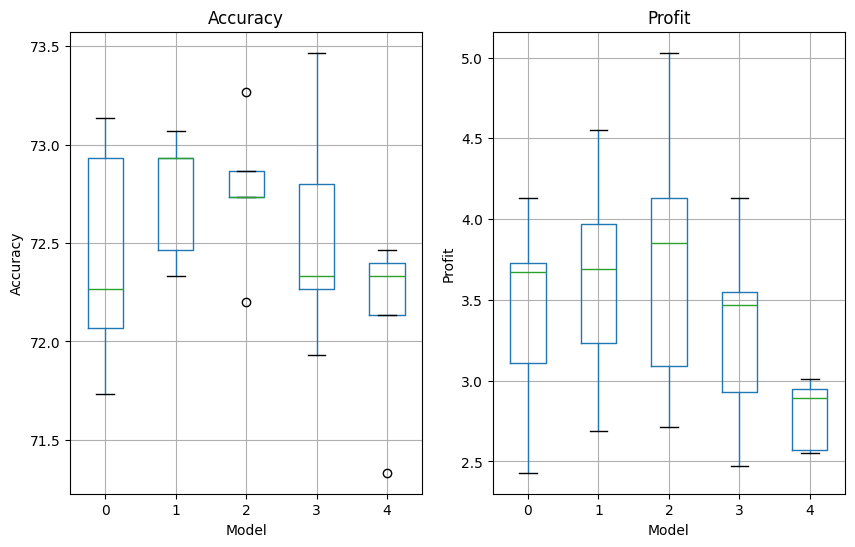

In [23]:
%matplotlib inline
print(results_acc.describe())

# 2 subplots in one row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Generate boxplots
results_acc.boxplot(ax=ax[0])
results_profit.boxplot(ax=ax[1])

# Set labels and titles
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')
ax[1].set_title('Profit')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Profit')

# Save to .png and show plot
plt.savefig(f'boxplot_{testingParameter}.png')
plt.show()